#### OBJECTIF 
Utiliser les données d'enquete ur le tourisme et le ML pour predire combien d'argent un touriste depensera en tanzanie.

In [1]:
1+1

2

In [237]:
# Importons les librairies que nous allons utiliser dans cette etude.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [3]:
# Chargeons les données utilisées pour cette étude.
data=pd.read_csv('Train.csv')
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

#### Identification de la variable cible (target)

In [6]:
# La variable cible est : total_cost
data['total_cost']

0         674602.5
1        3214906.5
2        3315000.0
3        7790250.0
4        1657500.0
           ...    
4804     3315000.0
4805    10690875.0
4806     2246636.7
4807     1160250.0
4808    13260000.0
Name: total_cost, Length: 4809, dtype: float64

In [9]:
# Nombre de ligne et nombre de colonnes de la base de données utilisée
# La base de données contient 4809 lignes et 23 colonnes
data.shape

(4809, 23)

In [15]:
# Determinons le type de chaque variable 
data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [16]:
# somme totale de chaque type de variable dans la base de données
data.dtypes.value_counts()

object     18
float64     5
dtype: int64

In [18]:
# Identification des valeurs manquantes
data.isna().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

<AxesSubplot:>

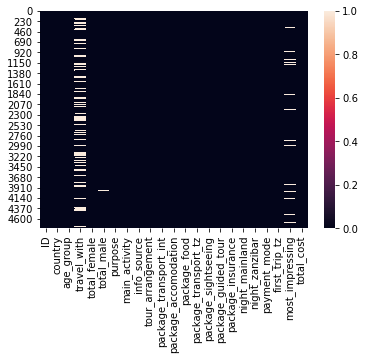

In [42]:
# Visualisation des variables manquantes sur une carte.
sns.heatmap(data.isna())

#### Visualisation des variables  et de la target pour mieux les comprendres

In [22]:
# visualisation de la variable cible 
data['total_cost'].unique()


array([  674602.5,  3214906.5,  3315000. , ...,  3150580. , 38339920. ,
        2246636.7])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cost', ylabel='count'>

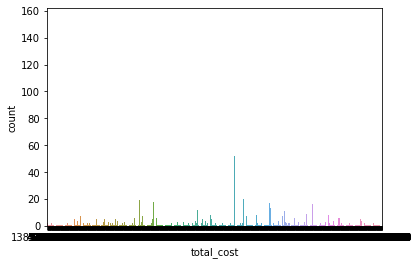

In [33]:
sns.countplot(data['total_cost'])

<AxesSubplot:xlabel='total_cost', ylabel='Count'>

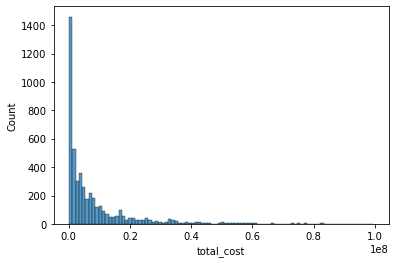

In [34]:
sns.histplot(data['total_cost'])

C:\Users\NEUMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cost'>

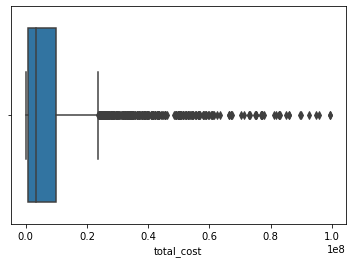

In [26]:
sns.boxplot(data['total_cost'])

<AxesSubplot:ylabel='country'>

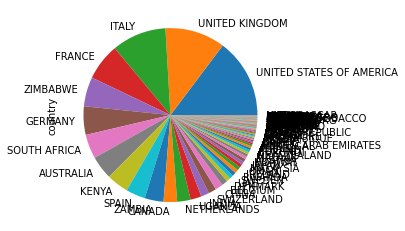

In [73]:
data['country'].value_counts().plot.pie()

<AxesSubplot:ylabel='age_group'>

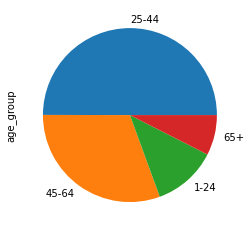

In [75]:
data['age_group'].value_counts().plot.pie()

In [43]:
# Identifier la relation entre la variable cible et les autres variables.
data.corr()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
total_female,1.000000,0.471180,0.031200,0.138555,0.286097
total_male,0.471180,1.000000,-0.041964,0.050318,0.185848
night_mainland,0.031200,-0.041964,1.000000,-0.118155,0.020473
night_zanzibar,0.138555,0.050318,-0.118155,1.000000,0.145139
total_cost,0.286097,0.185848,0.020473,0.145139,1.000000


### ELIMINATION DES VALEURS MANQUANTES ET ENCODAGE DES DONNEES.

In [66]:
# Supprimons les valeurs manquantes .
data=data.dropna(axis=0)

In [67]:
data.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [74]:
data.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

#### ENCODAGE DES VARIABLES DE TYPE OBJECT

In [78]:
# Encodage la variable age_group. 1-24==>0 ;25-44==1;45-64==>2.
le=LabelEncoder()
data['age_group']=le.fit_transform(data['age_group'])
data['age_group']

0       2
2       1
3       1
6       2
7       2
       ..
4803    0
4804    2
4805    1
4807    1
4808    1
Name: age_group, Length: 3460, dtype: int64

In [91]:

# Encodage la variable travel_with.'Friends/Relatives'==>2 ;'Alone'==0;'Spouse'==>3 ; Children'==>1 ; Spouse and Children'==>5.
le=LabelEncoder()
data['travel_with']=le.fit_transform(data['travel_with'])
data['travel_with'].head(10)

0     2
2     0
3     3
6     0
7     2
9     0
10    3
11    1
12    1
13    2
Name: travel_with, dtype: int64

In [96]:
data['purpose'].unique()

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Business', 'Scientific and Academic', 'Volunteering',
       'Meetings and Conference', 'Other'], dtype=object)

In [116]:
data['purpose'].head(25)

0               Leisure and Holidays
2     Visiting Friends and Relatives
3               Leisure and Holidays
6                           Business
7               Leisure and Holidays
9                           Business
10              Leisure and Holidays
11              Leisure and Holidays
12              Leisure and Holidays
13              Leisure and Holidays
14    Visiting Friends and Relatives
15              Leisure and Holidays
16    Visiting Friends and Relatives
18    Visiting Friends and Relatives
22              Leisure and Holidays
23              Leisure and Holidays
24              Leisure and Holidays
25           Scientific and Academic
26                          Business
28              Leisure and Holidays
30                      Volunteering
31    Visiting Friends and Relatives
32              Leisure and Holidays
33    Visiting Friends and Relatives
34    Visiting Friends and Relatives
Name: purpose, dtype: object

In [113]:
# (data['purpose']=='Leisure and Holidays').value_counts()
    


In [120]:
"""
Encodage la variable purpose 

'Leisure and Holidays':1, 
'Visiting Friends and Relatives':5,
'Business': 0,
'Scientific and Academic': 4,
'Volunteering': 6,
'Meetings and Conference': 2,
'Other: 3'
"""
le=LabelEncoder()
data['purpose']=le.fit_transform(data['purpose'])
data['purpose'].head(50)

0     1
2     5
3     1
6     0
7     1
9     0
10    1
11    1
12    1
13    1
14    5
15    1
16    5
18    5
22    1
23    1
24    1
25    4
26    0
28    1
30    6
31    5
32    1
33    5
34    5
35    1
36    5
37    4
38    1
39    2
40    5
41    5
43    1
44    1
45    0
47    1
48    1
51    2
53    6
54    1
57    5
59    5
61    2
62    1
63    4
65    1
66    1
67    5
68    2
69    1
Name: purpose, dtype: int64

In [92]:
data['travel_with'].head(10)

0     2
2     0
3     3
6     0
7     2
9     0
10    3
11    1
12    1
13    2
Name: travel_with, dtype: int64

In [121]:
# data1=pd.read_csv('Train.csv')
# data1=data1.dropna(axis=0)
# data1['purpose'].head(50)

In [124]:
data['main_activity'].unique()

array(['Wildlife tourism', 'Cultural tourism', 'Mountain climbing',
       'Beach tourism', 'Hunting tourism', 'Bird watching', 'business',
       'Conference tourism', 'Diving and Sport Fishing'], dtype=object)

In [127]:
data['main_activity'].head(10)

0     7.0
2     3.0
3     7.0
6     6.0
7     7.0
9     7.0
10    7.0
11    0.0
12    7.0
13    7.0
Name: main_activity, dtype: float64

In [128]:
"""
'Wildlife tourism': 7, 
'Cultural tourism':3,
'Mountain climbing':6,
'Beach tourism'0,
'Hunting tourism':5,
'Bird watching':1,
'business':8,
'Conference tourism2:4',
'Diving and Sport Fishing:4'
"""
oe=OrdinalEncoder()
data['main_activity']=oe.fit_transform(data[['main_activity']])
data['main_activity'].head(50)

0     7.0
2     3.0
3     7.0
6     6.0
7     7.0
9     7.0
10    7.0
11    0.0
12    7.0
13    7.0
14    0.0
15    0.0
16    6.0
18    3.0
22    7.0
23    0.0
24    7.0
25    0.0
26    7.0
28    7.0
30    5.0
31    5.0
32    7.0
33    1.0
34    5.0
35    7.0
36    5.0
37    6.0
38    0.0
39    0.0
40    0.0
41    0.0
43    7.0
44    0.0
45    8.0
47    7.0
48    7.0
51    0.0
53    5.0
54    0.0
57    7.0
59    0.0
61    6.0
62    0.0
63    6.0
65    7.0
66    2.0
67    0.0
68    6.0
69    7.0
Name: main_activity, dtype: float64

In [130]:
# data1=pd.read_csv('Train.csv')
# data1=data1.dropna(axis=0)
# data1['main_activity'].head(50)


In [131]:
data.dtypes

ID                        object
country                   object
age_group                  int64
travel_with                int64
total_female             float64
total_male               float64
purpose                    int64
main_activity            float64
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [132]:
# Encoder la variable info_source 
le=LabelEncoder()
data['info_source']=le.fit_transform(data[['info_source']])
data['info_source'].head(5)

C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0    0
2    0
3    5
6    0
7    5
Name: info_source, dtype: int32

In [134]:
# Encoder la variable info_source 
le=LabelEncoder()
data['tour_arrangement']=le.fit_transform(data[['tour_arrangement']])
data['tour_arrangement'].head(5)

0    0
2    0
3    1
6    0
7    1
Name: tour_arrangement, dtype: int32

In [136]:
# Encoder la variable package_transport_int 
le=LabelEncoder()
data['package_transport_int']=le.fit_transform(data[['package_transport_int']])
data['package_transport_int'].head(5)

0    0
2    0
3    0
6    0
7    1
Name: package_transport_int, dtype: int32

In [138]:
# Encoder la variable package_accomodation 
le=LabelEncoder()
data['package_accomodation']=le.fit_transform(data[['package_accomodation']])
data['package_accomodation'].head(5)

0    0
2    0
3    1
6    0
7    1
Name: package_accomodation, dtype: int32

In [143]:
# Encoder la variable package_food 
le=LabelEncoder()
data['package_food']=le.fit_transform(data[['package_food']])
data['package_food'].head(5)

0    0
2    0
3    1
6    0
7    1
Name: package_food, dtype: int32

In [156]:
# Encoder la variable package_transport_tz 
le=LabelEncoder()
data['package_transport_tz']=le.fit_transform(data[['package_transport_tz']])
data['package_transport_tz'].head(5)

0    0
2    0
3    1
6    0
7    1
Name: package_transport_tz, dtype: int64

In [155]:
# Encoder la variable package_sightseeing 
le=LabelEncoder()
data['package_sightseeing']=le.fit_transform(data[['package_sightseeing']])
data['package_sightseeing'].head(5)

0    0
2    0
3    1
6    0
7    1
Name: package_sightseeing, dtype: int64

In [154]:
# Encoder la variable package_guided_tour 
le=LabelEncoder()
data['package_guided_tour']=le.fit_transform(data[['package_guided_tour']])
data['package_guided_tour'].head(5)

0    0
2    0
3    1
6    0
7    1
Name: package_guided_tour, dtype: int64

In [161]:
# Encoder la variable payment_mode 
le=LabelEncoder()
data['payment_mode']=le.fit_transform(data[['payment_mode']])
data['payment_mode'].head(5)

0    0
2    0
3    0
6    0
7    0
Name: payment_mode, dtype: int64

In [153]:
# Encoder la variable package_insurance 
le=LabelEncoder()
data['package_insurance']=le.fit_transform(data[['package_insurance']])
data['package_insurance'].head(5)

0    0
2    0
3    0
6    0
7    1
Name: package_insurance, dtype: int32

In [163]:
# Encoder la variable first_trip_tz 
le=LabelEncoder()
data['first_trip_tz']=le.fit_transform(data[['first_trip_tz']])
data['first_trip_tz'].head(5)

0    0
2    0
3    1
6    1
7    1
Name: first_trip_tz, dtype: int32

In [165]:
# Voir l'ensemble des categories qui se situent dans la variable most_impressing
data['most_impressing'].unique()

array(['Friendly People', 'Excellent Experience',
       'Wonderful Country, Landscape, Nature', 'No comments', ' Wildlife',
       'Satisfies and Hope Come Back', 'Good service'], dtype=object)

In [166]:
# Encoder la variable most_impressing 
le=LabelEncoder()
data['most_impressing']=le.fit_transform(data[['most_impressing']])
data['most_impressing'].head(5)

0    2
2    1
3    2
6    2
7    2
Name: most_impressing, dtype: int32

#### PREPARATION DES DONNEES POUR LA MISE EN PLACE DE MODELE PREDICTIF
Nous divisons les donnés d'entrainement en deux parties:
trainset (pour entrainer le modele : 80 % de la base de données d'entrainement)
testset(pour evaluer le modele : 20 % de la base de données d'entrainement).

In [226]:
# Preparation des données d'entrainement (trainset)

x=data.drop(data[['total_cost']],axis=1)
y=data['total_cost']



In [227]:
x=data.drop(data[['ID','country']],axis=1)


In [228]:
# Diviser la base de données utilisée
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=1)

###### Preparation des données de test (testset).

In [173]:
# Preparation des données de test (testset).
data_val=pd.read_csv('Test.csv')
#Nombre de valeurs manqantes dans les données de test.
data_val.isna().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [176]:
# Suppression des valeurs manquantes
data_val=data_val.dropna()
data_val.isna().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64

In [178]:
# Encodage la variable age_group. 1-24==>0 ;25-44==1;45-64==>2.
le=LabelEncoder()
data_val['age_group']=le.fit_transform(data_val['age_group'])


# Encodage la variable travel_with.'Friends/Relatives'==>2 ;'Alone'==0;'Spouse'==>3 ; Children'==>1 ; Spouse and Children'==>5.
le=LabelEncoder()
data_val['travel_with']=le.fit_transform(data_val['travel_with'])


"""
Encodage la variable purpose 

'Leisure and Holidays':1, 
'Visiting Friends and Relatives':5,
'Business': 0,
'Scientific and Academic': 4,
'Volunteering': 6,
'Meetings and Conference': 2,
'Other: 3'
"""
le=LabelEncoder()
data_val['purpose']=le.fit_transform(data_val['purpose'])



"""
'Wildlife tourism': 7, 
'Cultural tourism':3,
'Mountain climbing':6,
'Beach tourism'0,
'Hunting tourism':5,
'Bird watching':1,
'business':8,
'Conference tourism2:4',
'Diving and Sport Fishing:4'
"""
oe=OrdinalEncoder()
data_val['main_activity']=oe.fit_transform(data_val[['main_activity']])



# Encoder la variable info_source 
le=LabelEncoder()
data_val['info_source']=le.fit_transform(data_val[['info_source']])


# Encoder la variable tour_arrangement 
le=LabelEncoder()
data_val['tour_arrangement']=le.fit_transform(data_val[['tour_arrangement']])



# Encoder la variable package_transport_int 
le=LabelEncoder()
data_val['package_transport_int']=le.fit_transform(data_val[['package_transport_int']])


# Encoder la variable package_accomodation 
le=LabelEncoder()
data_val['package_accomodation']=le.fit_transform(data_val[['package_accomodation']])


# Encoder la variable package_food 
le=LabelEncoder()
data_val['package_food']=le.fit_transform(data_val[['package_food']])


# Encoder la variable package_transport_tz 
le=LabelEncoder()
data_val['package_transport_tz']=le.fit_transform(data_val[['package_transport_tz']])



# Encoder la variable package_sightseeing 
le=LabelEncoder()
data_val['package_sightseeing']=le.fit_transform(data_val[['package_sightseeing']])


# Encoder la variable package_guided_tour 
le=LabelEncoder()
data_val['package_guided_tour']=le.fit_transform(data_val[['package_guided_tour']])


# Encoder la variable payment_mode 
le=LabelEncoder()
data_val['payment_mode']=le.fit_transform(data_val[['payment_mode']])



# Encoder la variable package_insurance 
le=LabelEncoder()
data_val['package_insurance']=le.fit_transform(data_val[['package_insurance']])


# Encoder la variable first_trip_tz 
le=LabelEncoder()
data_val['first_trip_tz']=le.fit_transform(data_val[['first_trip_tz']])


# Encoder la variable most_impressing 
le=LabelEncoder()
data_val['most_impressing']=le.fit_transform(data_val[['most_impressing']])

C:\Users\NEUMAN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [179]:
data_val

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,2,3,1.0,1.0,1,7.0,5,1,...,1,1,1,1,1,10,3,0,1,0
1,tour_100,SOUTH AFRICA,1,2,0.0,4.0,0,7.0,3,1,...,0,0,0,0,0,13,0,0,0,6
2,tour_1001,GERMANY,1,2,3.0,0.0,1,0.0,0,0,...,0,0,0,0,0,7,14,0,0,4
3,tour_1006,CANADA,0,2,2.0,0.0,1,3.0,7,0,...,0,0,0,0,0,0,4,0,1,2
4,tour_1009,UNITED KINGDOM,2,2,2.0,2.0,1,7.0,0,1,...,1,1,0,0,0,10,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,tour_977,SOUTH AFRICA,1,2,1.0,2.0,0,7.0,1,0,...,0,0,0,0,0,2,0,1,1,4
1597,tour_990,ITALY,2,4,3.0,1.0,1,7.0,0,1,...,1,1,1,0,0,10,5,2,1,0
1598,tour_992,FINLAND,1,0,0.0,1.0,2,6.0,0,0,...,0,0,0,0,0,6,0,0,1,4
1599,tour_996,SOUTH AFRICA,0,0,0.0,1.0,0,0.0,0,0,...,0,0,0,0,0,4,0,0,1,0


In [231]:
# Trouvons les meilleurs parametres pour l'algorithme du Random Forest.
rg=RandomForestRegressor()
hyper_params_randomForest={'n_estimators':[800,1000], 
                           'max_features':[1,0.5,0.2],
                           'random_state':[3,4,5]
              }
grid=GridSearchCV(rg, hyper_params_randomForest, cv=5)
grid.fit(x_train,y_train)
print("Meilleurs parametres",grid.best_params_)


Meilleurs parametres {'max_features': 0.5, 'n_estimators': 1000, 'random_state': 4}


#### Entrainement et evaluation des algorithmes utilisés

In [211]:
# Definissons la fonction evaluation_model
def evaluation_model(model):
    
    model.fit(x_train, y_train)
    
    y_pred=model.predict(x_val)
    
    mae=mean_absolute_error(y_val,y_pred)
    
    print(f"cet algorithme a pour erreur absolue moyen : {mae}")
    

In [238]:
# Algorithmes utilisés
#RandomForestRegressor=RandomForestRegressor(max_features= 0.5, n_estimators=1000, random_state= 4)
RandomForestRegressor=RandomForestRegressor()
LinearRegression=LinearRegression()
SVR=SVR()
GradientBoostingRegressor=GradientBoostingRegressor()

In [239]:
# Nous creons un dictionnaire qui regroupe tous les algorithmes utilisés.
dict_of_models={
    'RandomForestRegressor':RandomForestRegressor,
    'LinearRegression':LinearRegression,
    'SVR':SVR,
    'GradientBoostingRegressor':GradientBoostingRegressor
}

In [240]:
# Evaluation de chaque algorithme avec la fonction: evaluation_model.
for name, model  in dict_of_models.items():
    print(name)
    evaluation_model(model)

RandomForestRegressor
cet algorithme a pour erreur absolue moen : 23983.729210722602
LinearRegression
cet algorithme a pour erreur absolue moen : 6.031137998781108e-09
SVR
cet algorithme a pour erreur absolue moen : 8225455.7907691635
GradientBoostingRegressor
cet algorithme a pour erreur absolue moen : 61408.19075961609


#### Essayons d'ameliorer les resltats en utilisant le gridsearch CV

In [225]:
x_train

,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
2214,1,3,1.0,1.0,1,3.0,0,0,0,0,...,0,0,0,0,0.0,15.0,0,1,0,2269330.0
4203,3,3,1.0,1.0,1,7.0,5,1,0,1,...,1,1,1,1,10.0,0.0,0,1,2,12265500.0
1633,2,0,1.0,0.0,5,5.0,0,0,0,0,...,0,0,0,0,14.0,0.0,0,1,2,94440.0
4145,1,3,1.0,1.0,1,7.0,0,0,0,0,...,0,0,0,0,30.0,0.0,0,0,1,8287500.0
3980,1,3,1.0,1.0,1,7.0,5,1,0,1,...,1,1,1,0,4.0,10.0,0,1,0,6630000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,1,0,0.0,1.0,3,5.0,7,0,0,0,...,0,0,0,0,2.0,0.0,0,0,2,331500.0
1285,1,3,1.0,1.0,5,7.0,0,0,0,0,...,0,0,0,0,20.0,0.0,0,0,4,500000.0
1575,2,4,2.0,2.0,1,7.0,5,1,1,1,...,1,1,1,0,7.0,6.0,1,0,2,44098275.0
326,0,2,0.0,3.0,0,7.0,0,0,0,0,...,0,0,0,0,5.0,0.0,1,1,4,2320500.0
